In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [39]:
train_dataset = pd.read_csv('/home/scg2151/waymo-project/csv_data/training/training_data_1_12.csv', names=["vx", "vy", "vz", "dx", "dy", "vfx", "vfy", "vfz", "afx", "afy", "afz", "num_v_labels", "ax", "ay", "az"])
test_dataset = pd.read_csv('/home/scg2151/waymo-project/csv_data/validation/validation_data_1_12.csv', names=["vx", "vy", "vz", "dx", "dy", "vfx", "vfy", "vfz", "afx", "afy", "afz", "num_v_labels", "ax", "ay", "az"])

In [40]:
train_dataset = train_dataset.drop(train_dataset.index[0])
test_dataset = test_dataset.drop(test_dataset.index[0])

In [41]:
print("Shape of the training data is", train_dataset.shape)
print("Shape of the validation data is", test_dataset.shape)

Shape of the training data is (17654, 15)
Shape of the validation data is (6947, 15)


In [42]:
X_train = train_dataset.iloc[:, :12]
X_test = test_dataset.iloc[:, :12]
print("Shape of the X_train is", X_train.shape)
print("Shape of the X_test is", X_test.shape)

Shape of the X_train is (17654, 12)
Shape of the X_test is (6947, 12)


In [43]:
Y_train = train_dataset.iloc[:,12:]
Y_test = test_dataset.iloc[:, 12:]
print("Shape of the Y_train is", Y_train.shape)
print("Shape of the Y_test is", Y_test.shape)

Shape of the Y_train is (17654, 3)
Shape of the Y_test is (6947, 3)


In [44]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

In [51]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(12,)),
    
    Dense(3, activation='sigmoid'),
])

In [52]:
model.compile(optimizer='sgd', loss='mse',
              metrics=['mae', 'mse'])

In [53]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))


Train on 15888 samples, validate on 1766 samples
Epoch 1/50
15888/15888 [==============================] - 3s 165us/step - loss: 0.2044 - mae: 0.2616 - mse: 0.2044 - val_loss: 0.1872 - val_mae: 0.2509 - val_mse: 0.1872
Epoch 2/50
15888/15888 [==============================] - 1s 68us/step - loss: 0.1805 - mae: 0.2406 - mse: 0.1805 - val_loss: 0.1864 - val_mae: 0.2497 - val_mse: 0.1864
Epoch 3/50
15888/15888 [==============================] - 1s 68us/step - loss: 0.1799 - mae: 0.2398 - mse: 0.1799 - val_loss: 0.1861 - val_mae: 0.2493 - val_mse: 0.1861
Epoch 4/50
15888/15888 [==============================] - 1s 68us/step - loss: 0.1796 - mae: 0.2394 - mse: 0.1796 - val_loss: 0.1860 - val_mae: 0.2490 - val_mse: 0.1860
Epoch 5/50
15888/15888 [==============================] - 1s 67us/step - loss: 0.1794 - mae: 0.2392 - mse: 0.1794 - val_loss: 0.1859 - val_mae: 0.2489 - val_mse: 0.1859
Epoch 6/50
15888/15888 [==============================] - 1s 70us/step - loss: 0.1793 - mae: 0.2390 - ms

Epoch 48/50
15888/15888 [==============================] - 1s 68us/step - loss: 0.1784 - mae: 0.2378 - mse: 0.1784 - val_loss: 0.1855 - val_mae: 0.2483 - val_mse: 0.1855
Epoch 49/50
15888/15888 [==============================] - 1s 68us/step - loss: 0.1784 - mae: 0.2377 - mse: 0.1784 - val_loss: 0.1855 - val_mae: 0.2483 - val_mse: 0.1855
Epoch 50/50
15888/15888 [==============================] - 1s 68us/step - loss: 0.1784 - mae: 0.2377 - mse: 0.1784 - val_loss: 0.1855 - val_mae: 0.2483 - val_mse: 0.1855


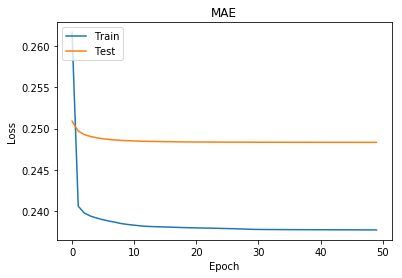

In [54]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('MAE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [56]:
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.29891524755491794
Mean Squared Error: 0.24767282286774417
Root Mean Squared Error: 0.49766738175989006
